In [6]:
from gklearn.utils.graphfiles import loadDataset
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from __future__ import print_function
import torch

0.0 1.0


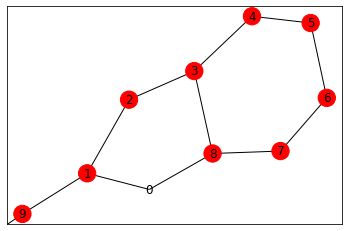

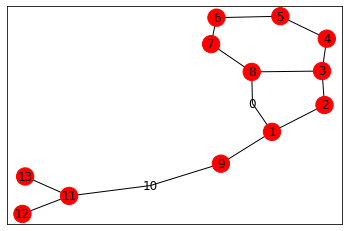

In [8]:
def label_to_color(label):
    if label == 'C':
        return 0.1
    elif label == 'O':
        return 0.8
    
def nodes_to_color_sequence(G):
    return [label_to_color(c[1]['label'][0]) for c in G.nodes(data=True)]

Gs,y = loadDataset('/home/luc/TRAVAIL/DeepGED/MAO/dataset.ds')

G1 = Gs[0]
G2 = Gs[2]
print(y[13],y[23])
nx.draw_networkx(G1,with_labels=True,node_color = nodes_to_color_sequence(G1),cmap='autumn')
plt.figure()

nx.draw_networkx(G2,with_labels=True,node_color = nodes_to_color_sequence(G2),cmap='autumn')

tensor([0.2238, 0.2291, 0.1924, 0.3548], grad_fn=<DivBackward0>)


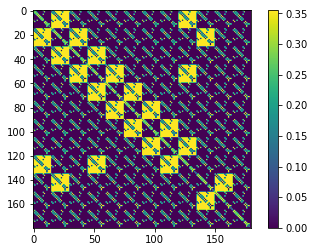

In [9]:
#costs={'nodeSubs':1.0,'nodeIns':1.0,'nodeDel':1.0,'edgeSubs':0,'edgeIns':1.0,'edgeDel':1.0}
def construct_cost_matrix(G1,G2,cost):
    n = G1.order()
    m = G2.order()
    
    #C2=torch.zeros(((n+1)*(m+1),(n+1)*(m+1)))    
    C2=cost[3]*torch.tensor(np.array([ [  k!=l and G1.has_edge(k//(m+1),l//(m+1))^G2.has_edge(k%(m+1),l%(m+1)) for k in range((n+1)*(m+1))] for l in range((n+1)*(m+1))]))        

    D=torch.zeros((n+1)*(m+1))
    D[n*(m+1):]=costs[1]
    D[n*(m+1)+m]=0
    D[np.array([i*(m+1)+m for i in range(n)])]=costs[1]
    D[[k for k in range(n*(m+1)) if k%(m+1) != m]]=costs[0]*torch.tensor([(G1.nodes[k//(m+1)]!=G2.nodes[k%(m+1)]) for k in range(n*(m+1)) if k%(m+1) != m] )

    C2[range(len(C2)),range(len(C2))]=D
    
    
    #C2=C2.masked_fill(mask,costs['edgeDel'])
    
    return C2
x=torch.rand(4,requires_grad=True) # 0 node subs, 1 nodeIns/Del, 2 : edgeSubs, 3 edgeIns/Del
x=torch.exp(x)
costs=x/x.sum()
print(costs)
C=construct_cost_matrix(G1,G2,costs)
with torch.no_grad():
    C2=C.detach().numpy()
    plt.figure(1)
    plt.imshow(C2)
    plt.colorbar()

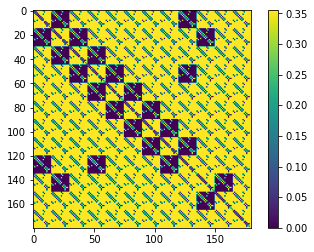

In [10]:
n=G1.order()
m=G2.order()
M=(C.max()*torch.ones(((n+1)*(m+1),(n+1)*(m+1))) -C)
M2=M.detach().numpy()
plt.imshow(M2)
plt.colorbar()

In [11]:
#u, l, v = torch.svd(M)
e,v=torch.symeig(M,eigenvectors=True)
#print(e[-1])
#print('w=',w)
eig_val=e[-1]
#print('w[-1]=',w[:,-1])

first_ev=v[:,-1]
if(first_ev.sum() <0):
    first_ev=-first_ev
print(eig_val.item())
print('first_ev=',first_ev)
print((first_ev@M@first_ev.t()))

47.66600036621094
first_ev= tensor([0.0757, 0.0701, 0.0754, 0.0704, 0.0751, 0.0748, 0.0748, 0.0751, 0.0704,
        0.0751, 0.0751, 0.0696, 0.0797, 0.0797, 0.0839, 0.0680, 0.0646, 0.0680,
        0.0645, 0.0678, 0.0676, 0.0676, 0.0678, 0.0645, 0.0678, 0.0678, 0.0639,
        0.0711, 0.0711, 0.0742, 0.0754, 0.0701, 0.0757, 0.0704, 0.0751, 0.0748,
        0.0748, 0.0751, 0.0704, 0.0751, 0.0751, 0.0696, 0.0797, 0.0797, 0.0839,
        0.0685, 0.0647, 0.0685, 0.0652, 0.0683, 0.0681, 0.0681, 0.0683, 0.0649,
        0.0683, 0.0683, 0.0643, 0.0717, 0.0717, 0.0748, 0.0748, 0.0697, 0.0748,
        0.0700, 0.0749, 0.0743, 0.0743, 0.0745, 0.0700, 0.0745, 0.0746, 0.0692,
        0.0791, 0.0791, 0.0832, 0.0743, 0.0693, 0.0743, 0.0696, 0.0740, 0.0741,
        0.0738, 0.0740, 0.0696, 0.0740, 0.0741, 0.0688, 0.0785, 0.0785, 0.0826,
        0.0743, 0.0693, 0.0743, 0.0696, 0.0740, 0.0738, 0.0741, 0.0740, 0.0696,
        0.0740, 0.0741, 0.0688, 0.0785, 0.0785, 0.0826, 0.0748, 0.0697, 0.0748,
        0.07

tensor([[0.0757, 0.0701, 0.0754, 0.0704, 0.0751, 0.0748, 0.0748, 0.0751, 0.0704,
         0.0751, 0.0751, 0.0696, 0.0797, 0.0797, 0.0839],
        [0.0680, 0.0646, 0.0680, 0.0645, 0.0678, 0.0676, 0.0676, 0.0678, 0.0645,
         0.0678, 0.0678, 0.0639, 0.0711, 0.0711, 0.0742],
        [0.0754, 0.0701, 0.0757, 0.0704, 0.0751, 0.0748, 0.0748, 0.0751, 0.0704,
         0.0751, 0.0751, 0.0696, 0.0797, 0.0797, 0.0839],
        [0.0685, 0.0647, 0.0685, 0.0652, 0.0683, 0.0681, 0.0681, 0.0683, 0.0649,
         0.0683, 0.0683, 0.0643, 0.0717, 0.0717, 0.0748],
        [0.0748, 0.0697, 0.0748, 0.0700, 0.0749, 0.0743, 0.0743, 0.0745, 0.0700,
         0.0745, 0.0746, 0.0692, 0.0791, 0.0791, 0.0832],
        [0.0743, 0.0693, 0.0743, 0.0696, 0.0740, 0.0741, 0.0738, 0.0740, 0.0696,
         0.0740, 0.0741, 0.0688, 0.0785, 0.0785, 0.0826],
        [0.0743, 0.0693, 0.0743, 0.0696, 0.0740, 0.0738, 0.0741, 0.0740, 0.0696,
         0.0740, 0.0741, 0.0688, 0.0785, 0.0785, 0.0826],
        [0.0748, 0.0697, 0.

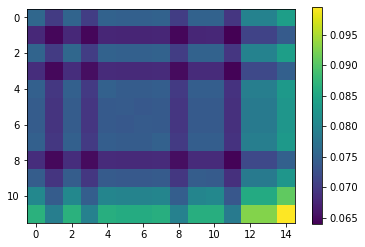

In [12]:
S0 = first_ev.view(G1.order()+1,G2.order()+1)
Splot=S0.detach().numpy()
plt.imshow(Splot)
#print(np.sum(S0,axis=0))
#print(np.sum(S0,axis=1))
plt.colorbar()

print(S0)

ones_n: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
lines: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 3.0908],
       grad_fn=<SumBackward1>)
columns: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 6.0908], grad_fn=<SumBackward1>)
tensor([[0.0585, 0.0585, 0.0585, 0.0585, 0.0585, 0.0585, 0.0585, 0.0585, 0.0585,
         0.0585, 0.0585, 0.0586, 0.0585, 0.0585, 0.1807],
        [0.0585, 0.0587, 0.0585, 0.0586, 0.0585, 0.0585, 0.0585, 0.0585, 0.0586,
         0.0585, 0.0585, 0.0587, 0.0584, 0.0584, 0.1803],
        [0.0585, 0.0585, 0.0585, 0.0585, 0.0585, 0.0585, 0.0585, 0.0585, 0.0585,
         0.0585, 0.0585, 0.0586, 0.0585, 0.0585, 0.1807],
        [0.0585, 0.0586, 0.0585, 0.0587, 0.0585, 0.0585, 0.0585, 0.0585, 0.0586,
         0.0585, 0.0585, 0.0587, 0.0584, 0.0584, 0.1803],
        [0.0585, 0.0586, 0.0585, 0.0586, 0.0585, 0.0585, 0

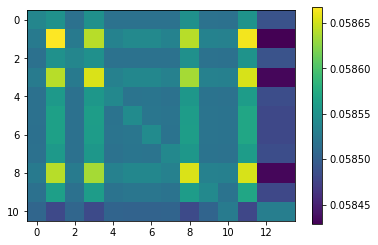

In [13]:
def proj_bisto_alter_eps_assig(S0):
    ones_n = torch.ones(S0.shape[0])
    ones_m = torch.ones(S0.shape[1])
    print("ones_n:",ones_n)
    Sk = S0
    for i in range(20):
        D=torch.diag(1.0/(torch.matmul(Sk,ones_m)))
        D[D.shape[0]-1,D.shape[1]-1]=1.0
        Sk1 = torch.matmul(D,Sk)
        D=torch.diag(1.0/(torch.matmul(ones_n,Sk1)))
        D[D.shape[0]-1,D.shape[1]-1]=1.0
        Sk = torch.matmul(Sk1,D)
        
    return Sk

S0=torch.exp(S0)

S = proj_bisto_alter_eps_assig(S0)
print("lines:",torch.sum(S,0))
print("columns:",torch.sum(S,1))
Splot=S.detach().numpy()[0:(S.shape[0]-1),0:(S.shape[1]-1)]
plt.imshow(Splot)
plt.colorbar()
v=torch.flatten(S)
print(S)
#print(v)
ged=.5*(v.t()@C@v)
print('GED=', ged.item())
out=(y[13]!=y[23])*ged-(y[13]==y[23])*ged
print(out)
out.backward()
#torch.nn.HingeEmbeddingLoss(margin=1.0, size_average=None, reduce=None, reduction='mean')